In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

In [2]:
from matplotlib import font_manager, rc 

font_name=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name) 

In [3]:
df=pd.read_excel('제공데이터.xlsx', encoding='utf-8') 
df.head(5)

,Unnamed: 0,Unnamed: 0.1,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,시청률,날짜,강수량(mm),공휴일
0,0,0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,2,52.606516,1,6,0.0,1,0.0,1
1,1,1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,2,109.548872,1,6,0.0,1,0.0,1
2,2,2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,2,81.754386,1,6,0.0,1,0.0,1
3,3,3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,2,174.310777,1,6,0.0,1,0.0,1
4,4,4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,2,167.218045,1,6,0.0,1,0.0,1


In [4]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

df=df.drop(df[df['취급액']==0].index)

In [5]:
df.describe()

,노출(분),마더코드,상품코드,상품군,판매단가,취급액,요일,주문량,월,시간대,시청률,날짜,강수량(mm),공휴일
count,35379.000000,35379.000000,35379.000000,35379.000000,3.537900e+04,3.537900e+04,35379.000000,35379.000000,35379.000000,35379.000000,35379.000000,35379.000000,35379.000000,35379.000000
mean,20.333277,100394.664886,201228.059046,4.922242,3.878590e+05,2.310241e+07,3.994149,314.797301,6.492298,14.110574,0.004567,15.466322,2.404446,0.050595
std,3.095404,251.968182,739.288622,2.903809,6.264088e+05,2.005790e+07,2.002654,427.826506,3.395820,6.568274,0.008163,8.726040,8.088669,0.219172
min,2.000000,100000.000000,200000.000000,1.000000,1.280000e+04,1.030000e+05,1.000000,1.302349,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,20.000000,100155.000000,200569.000000,3.000000,5.900000e+04,7.998500e+06,2.000000,26.283654,4.000000,9.000000,0.000000,8.000000,0.000000,0.000000
50%,20.000000,100353.000000,201175.000000,4.000000,9.900000e+04,1.732600e+07,4.000000,130.000000,6.000000,15.000000,0.001350,15.000000,0.000000,0.000000
75%,20.000000,100604.000000,201879.000000,7.000000,3.990000e+05,3.276300e+07,6.000000,451.719941,9.000000,20.000000,0.005200,23.000000,0.200000,0.000000
max,40.000000,100849.000000,202513.000000,11.000000,7.930000e+06,3.220090e+08,7.000000,8070.401003,12.000000,23.000000,0.125600,31.000000,63.200000,1.000000


In [6]:
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,시청률,날짜,강수량(mm),공휴일
0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,2,52.606516,1,6,0.0,1,0.0,1
1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,2,109.548872,1,6,0.0,1,0.0,1
2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,2,81.754386,1,6,0.0,1,0.0,1
3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,2,174.310777,1,6,0.0,1,0.0,1
4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,2,167.218045,1,6,0.0,1,0.0,1


## 시청률이 높을 때?

In [7]:
df['시청률'].mean()

0.004566973705838501

In [8]:
df=df[df['시청률']>0.005]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9106 entries, 17 to 37367
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   방송일시     9106 non-null   datetime64[ns]
 1   노출(분)    9106 non-null   int64         
 2   마더코드     9106 non-null   int64         
 3   상품코드     9106 non-null   int64         
 4   상품명      9106 non-null   object        
 5   상품군      9106 non-null   int64         
 6   판매단가     9106 non-null   int64         
 7   취급액      9106 non-null   int64         
 8   요일       9106 non-null   int64         
 9   주문량      9106 non-null   float64       
 10  월        9106 non-null   int64         
 11  시간대      9106 non-null   int64         
 12  시청률      9106 non-null   float64       
 13  날짜       9106 non-null   int64         
 14  강수량(mm)  9106 non-null   float64       
 15  공휴일      9106 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(11), object(1)
memory usage: 1.2+ MB

In [10]:
df_cor=df.corr()
df_cor.head(5)

,노출(분),마더코드,상품코드,상품군,판매단가,취급액,요일,주문량,월,시간대,시청률,날짜,강수량(mm),공휴일
노출(분),1.000000,0.120044,0.111101,0.146570,0.149083,0.034893,0.008365,-0.082514,-0.055046,0.008477,-0.011019,-0.032903,0.049361,0.032600
마더코드,0.120044,1.000000,0.981935,-0.124246,-0.194116,-0.042822,-0.001500,0.004127,-0.065483,-0.100237,-0.036227,0.014827,-0.011652,-0.019279
상품코드,0.111101,0.981935,1.000000,-0.139237,-0.204530,-0.027677,-0.004956,0.018051,-0.075586,-0.108674,-0.034673,0.009851,-0.017028,-0.023153
상품군,0.146570,-0.124246,-0.139237,1.000000,0.296080,-0.229842,-0.030481,-0.244671,0.128938,0.082702,0.016791,-0.028989,0.061141,0.028079
판매단가,0.149083,-0.194116,-0.204530,0.296080,1.000000,-0.189321,-0.011651,-0.373977,-0.017627,0.282794,-0.017340,-0.070969,0.021675,0.070899


In [11]:
#수치형 데이터만
x=df.iloc[:, [1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14]]
y=df.iloc[:, [10]]

In [12]:
#훈련용, 학습용 데이터 나누기
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

랜덤포레스트

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

fr=RandomForestClassifier()
fr.fit(x_train, y_train)

fr_pred=fr.predict(x_test)
accuracy_score(y_test, fr_pred)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8660812294182217

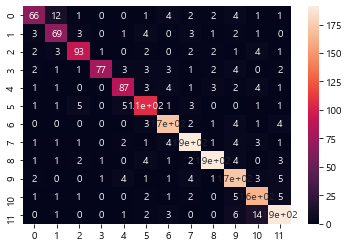

In [14]:
from sklearn.metrics import confusion_matrix

vi=pd.DataFrame(confusion_matrix(y_test, fr_pred))
sns.heatmap(vi, annot=True)

In [15]:
from sklearn.metrics import classification_report
classification_report(fr_pred, y_test)

'              precision    recall  f1-score   support\n\n           1       0.70      0.82      0.76        80\n           2       0.79      0.76      0.78        91\n           3       0.84      0.87      0.85       107\n           4       0.78      0.96      0.86        80\n           5       0.81      0.84      0.83       103\n           6       0.85      0.80      0.83       132\n           7       0.92      0.89      0.90       193\n           8       0.91      0.90      0.90       213\n           9       0.91      0.94      0.92       204\n          10       0.89      0.83      0.86       209\n          11       0.90      0.84      0.87       196\n          12       0.88      0.89      0.88       214\n\n    accuracy                           0.87      1822\n   macro avg       0.85      0.86      0.85      1822\nweighted avg       0.87      0.87      0.87      1822\n'

In [16]:
fr_pred

array([11,  3,  8, ...,  7,  5,  3], dtype=int64)

In [17]:
y_test

,월
33383,11
7049,3
30560,10
25701,9
26220,9
...,...
35778,12
26940,9
21472,7
14620,5


k-NN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

knn_pred=knn.predict(x_test)
accuracy_score(y_test, knn_pred)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.16410537870472008

의사결정 나무

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_pred=dt.predict(x_test)
accuracy_score(y_test, dt_pred)

0.862788144895719

In [20]:
dt_pred

array([11,  3, 10, ...,  7,  5,  3], dtype=int64)

In [21]:
y_test

,월
33383,11
7049,3
30560,10
25701,9
26220,9
...,...
35778,12
26940,9
21472,7
14620,5


AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ab=AdaBoostClassifier()
ab.fit(x_train, y_train)

ab_pred=ab.predict(x_test)
accuracy_score(y_test, ab_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.15367727771679474

XGBoost

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

gb_pred=gb.predict(x_test)
accuracy_score(y_test, gb_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6525795828759605

나이브베이즈

In [24]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train, y_train)

nb_pred=nb.predict(x_test)
accuracy_score(y_test, nb_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.12623490669593854

선형판별분석

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ld=LinearDiscriminantAnalysis()
ld.fit(x_train, y_train)

ld_pred=ld.predict(x_test)
accuracy_score(y_test, ld_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.15697036223929747

이차판별분석

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qd=QuadraticDiscriminantAnalysis()
qd.fit(x_train, y_train)

qd_pred=qd.predict(x_test)
accuracy_score(y_test, qd_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


0.05159165751920966

로지스틱 회귀

In [27]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train, y_train)

lr_pred=lr.predict(x_test)
accuracy_score(y_test, lr_pred)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.12184412733260154

In [28]:
accuracy_score(y_test, fr_pred)

0.8660812294182217

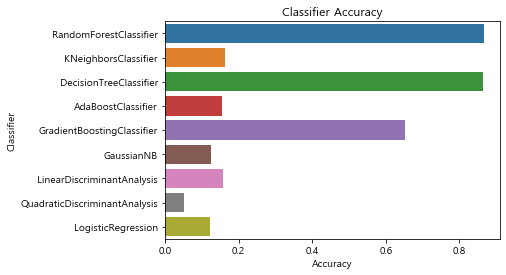

In [29]:
data={'Classifier':['RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'GaussianNB', 'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis', 'LogisticRegression'], 
      'Accuracy':[accuracy_score(y_test, fr_pred), accuracy_score(y_test, knn_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, ab_pred), accuracy_score(y_test, gb_pred), accuracy_score(y_test, nb_pred), accuracy_score(y_test, ld_pred), accuracy_score(y_test, qd_pred), accuracy_score(y_test, lr_pred)]}
lol=pd.DataFrame(data)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=lol)